In [2]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plat
import palettable as pal
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [39]:
!ls -lah

total 216
drwxr-xr-x   7 johnsolk  staff   224B May 23 13:03 .
drwxr-xr-x  14 johnsolk  staff   448B May 22 10:51 ..
drwxr-xr-x   3 johnsolk  staff    96B May 22 10:56 .ipynb_checkpoints
-rw-r--r--   1 johnsolk  staff    94K May 23 13:03 Figures_ICBF_poster_2018.ipynb
-rw-r--r--   1 johnsolk  staff   2.3K May 23 12:18 busco_scores_v3_actino.csv
-rw-r--r--   1 johnsolk  staff   2.1K May 22 11:40 busco_scores_v3_euk.csv
-rw-r--r--   1 johnsolk  staff   2.2K May 22 11:40 busco_scores_v3_met.csv


In [115]:
BUSCO_met_file = "busco_scores_v3_met.csv"
BUSCO_euk_file = "busco_scores_v3_euk.csv"
BUSCO_actino_file = "busco_scores_v3_actino.csv"
BUSCO_met = pd.read_csv(BUSCO_met_file)
BUSCO_euk = pd.read_csv(BUSCO_euk_file)
BUSCO_actino = pd.read_csv(BUSCO_actino_file)

In [116]:
BUSCO_euk.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %',
       'CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc',
       'Missing_perc']
BUSCO_met.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %',
       'CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc',
       'Missing_perc']
BUSCO_actino.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %',
       'CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc',
       'Missing_perc']
BUSCO_met['BUSCO Lineage Database'] = 'Metazoa'
BUSCO_euk['BUSCO Lineage Database'] = 'Eukaryota'
BUSCO_actino['BUSCO Lineage Database'] = 'Actinopterygii'
frames = [BUSCO_met,BUSCO_euk,BUSCO_actino]
BUSCO = pd.concat(frames)

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


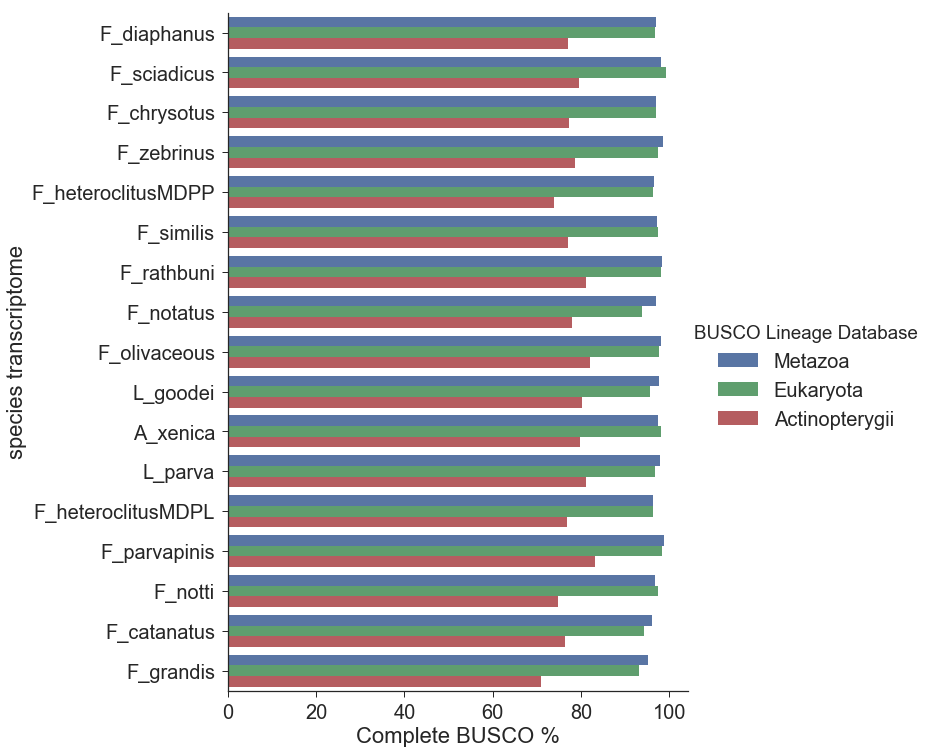

In [120]:
sns.set_style('ticks')
#sns.set(font_scale=2)
a = sns.factorplot(x="Complete BUSCO %", y="species transcriptome", hue="BUSCO Lineage Database", data=BUSCO, kind="bar", orient='h',size=11);
sns.despine()
#sns.set_style("white")
a.savefig('busco_all.pdf')

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


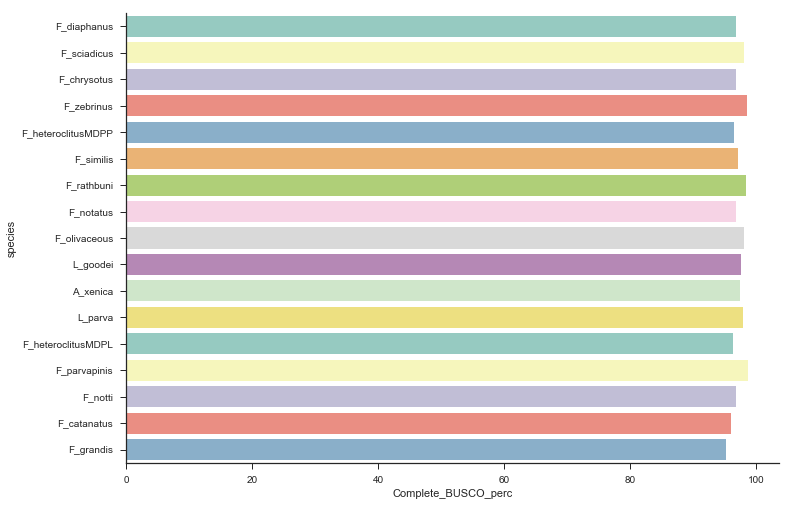

In [72]:
sns.set_style('ticks')
metazoa=sns.barplot(y='species',x='Complete_BUSCO_perc',data=BUSCO_met,palette="Set3")
sns.set_style("white")
sns.despine()

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


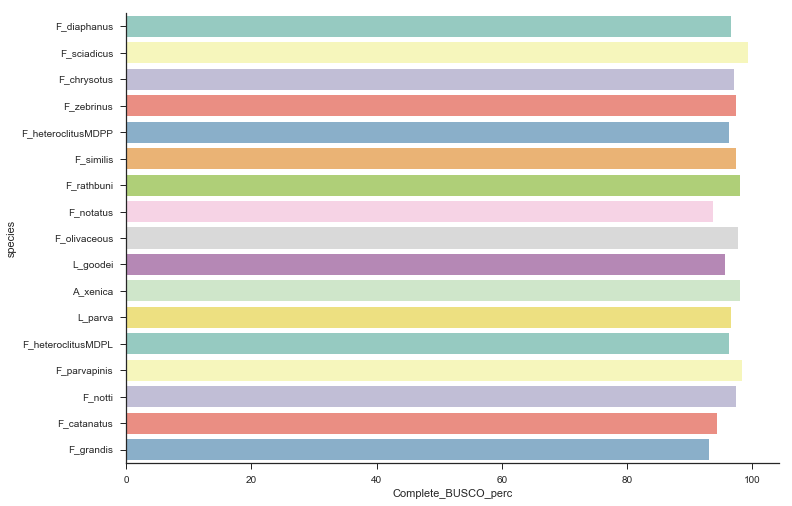

In [73]:
sns.set_style('ticks')
eukaryota=sns.barplot(y='species',x='Complete_BUSCO_perc',data=BUSCO_euk,palette="Set3")
sns.set_style("white")
sns.despine()

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


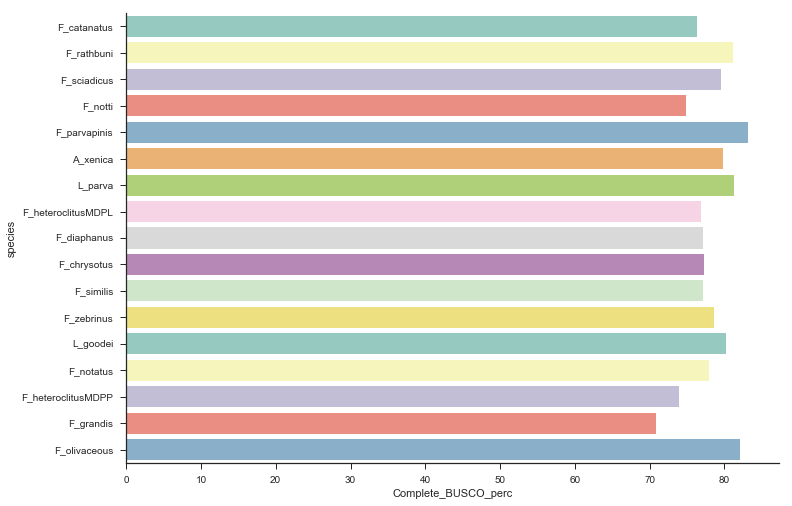

In [74]:
sns.set_style('ticks')
actino=sns.barplot(y='species',x='Complete_BUSCO_perc',data=BUSCO_actino,palette="Set3")
sns.set_style("white")
sns.despine()

Text(0.5,0,'species')

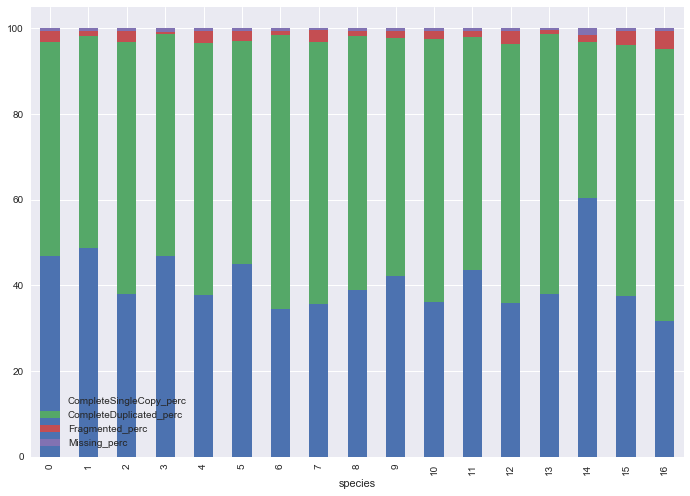

In [71]:
sns.set()
pl = BUSCO_met_stacked.plot(kind='bar', stacked=True,)
pl.set_xlabel('species')